In [ ]:
print("Hello Plant Disease Detection")

Hello Plant Disease Detection


In [ ]:
!pip install kaggle


In [ ]:
!ls

sample_data


In [ ]:
import os

os.listdir()

['.config', 'RiceLeafDataset.zip', '.ipynb_checkpoints', 'sample_data']

In [ ]:
os.listdir()

['.config',
 'RiceLeafDataset.zip',
 'rice_leaf_diseases',
 '.ipynb_checkpoints',
 'sample_data']

In [ ]:
import os
os.listdir('rice_leaf_diseases')

['Leaf smut', 'Bacterial leaf blight', 'Brown spot']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224,224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    'rice_leaf_diseases',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'rice_leaf_diseases',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

# Layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten())

# Fully Connected
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(3, activation='softmax'))  # 3 diseases/classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.3333 - loss: 9.8856 - val_accuracy: 0.3333 - val_loss: 10.0860
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.2083 - loss: 8.8092 - val_accuracy: 0.3333 - val_loss: 2.3273
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5260 - loss: 1.2947 - val_accuracy: 0.3750 - val_loss: 1.3049
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4453 - loss: 1.2086 - val_accuracy: 0.4583 - val_loss: 0.9841
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6602 - loss: 0.8934 - val_accuracy: 0.6667 - val_loss: 0.8089
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5430 - loss: 0.8402 - val_accuracy: 0.6667 - val_loss: 0.8416
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6289 - loss: 0.6829 - val_accuracy: 0.6667 - val_loss: 1.0807
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7747 - loss: 0.5679 - val_accuracy: 0.7500 - val_loss: 0.6860
Epoch 9

In [ ]:
model.save('rice_leaf_model.h5')

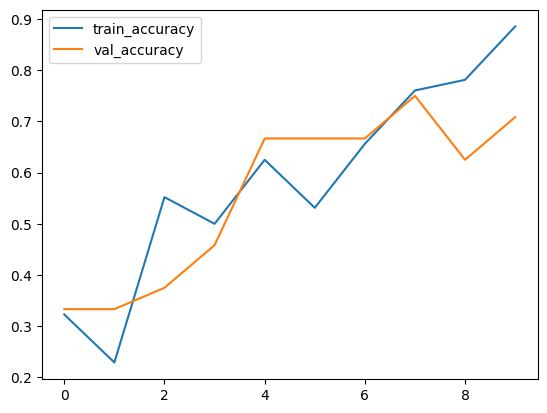

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
files.download('rice_leaf_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>